<a href="https://colab.research.google.com/github/midhunshyju/ML-project/blob/main/X_ray_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image as keras_image
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
image_train_dir='/content/drive/MyDrive/xray_dataset_covid19/train'
image_test_dir='/content/drive/MyDrive/xray_dataset_covid19/test'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    validation_split=0.2
)



In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Data loaders
train_generator = train_datagen.flow_from_directory(
    image_train_dir,
    target_size=(128, 128),
    batch_size=32,
    color_mode='rgb',
    subset='training',
    class_mode='categorical',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    image_train_dir,
    target_size=(128, 128),
    batch_size=32,
    color_mode='rgb',
    subset='validation',
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    image_test_dir,  # ✅ Corrected to test dir
    target_size=(128, 128),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)


Found 120 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


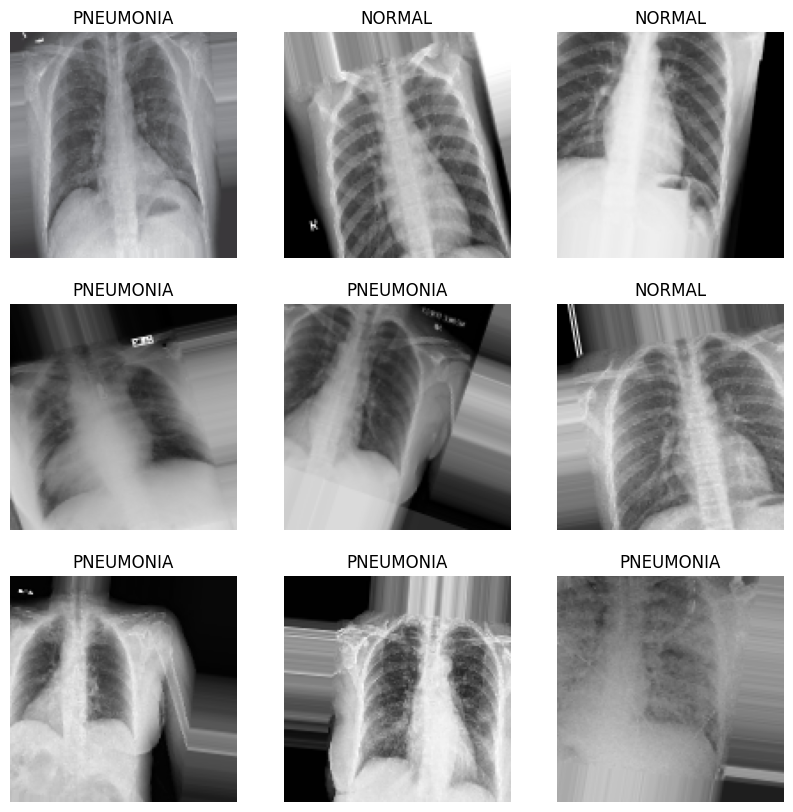

In [ ]:
images, labels = next(train_generator)
class_names = list(train_generator.class_indices.keys())
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')  # ✅ Softmax for categorical
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # ✅ Matches softmax + categorical
    metrics=['accuracy']
)

In [ ]:
earlystop = EarlyStopping(patience=5, restore_best_weights=True)

# Train
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[earlystop]
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 9s/step - accuracy: 0.5527 - loss: 0.7420 - val_accuracy: 0.5357 - val_loss: 0.6638
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6537 - loss: 0.6306 - val_accuracy: 0.5000 - val_loss: 0.7288
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7202 - loss: 0.5576 - val_accuracy: 0.5000 - val_loss: 0.7514
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6860 - loss: 0.5464 - val_accuracy: 0.6071 - val_loss: 0.6905
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 999ms/step - accuracy: 0.7994 - loss: 0.4892 - val_accuracy: 0.5357 - val_loss: 0.7631
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7767 - loss: 0.4808 - val_accuracy: 0.7143 - val_loss: 0.6483
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8629 - loss: 0.4042 - val_accuracy: 0.6071 - val_loss: 0.6297
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 960ms/step - accuracy: 0.8502 - loss: 0.4086 - val_accuracy: 0.7857 - val_loss: 0.4459
Epoch 9/5

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 542ms/step - accuracy: 0.9563 - loss: 0.1392
Test Loss: 0.1518
Test Accuracy: 0.9500


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,914,696 (37.82 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,609,798 (25.21 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step
Prediction: NORMAL (Confidence: 0.5675)


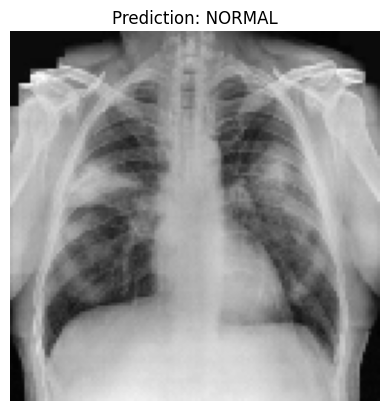

In [ ]:
# Predict on a single image
img_path = '/content/1-s2.0-S0263931909001811-gr3.jpg'

# Load and preprocess
img = keras_image.load_img(img_path, target_size=(128, 128))  # ✅ Match model input
img_array = keras_image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Predict
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = np.max(predictions[0])

print(f"Prediction: {predicted_class} (Confidence: {confidence:.4f})")

# Show image
plt.imshow(img)
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')
plt.show()


Text(0.5, 1.0, 'Loss over Epochs')

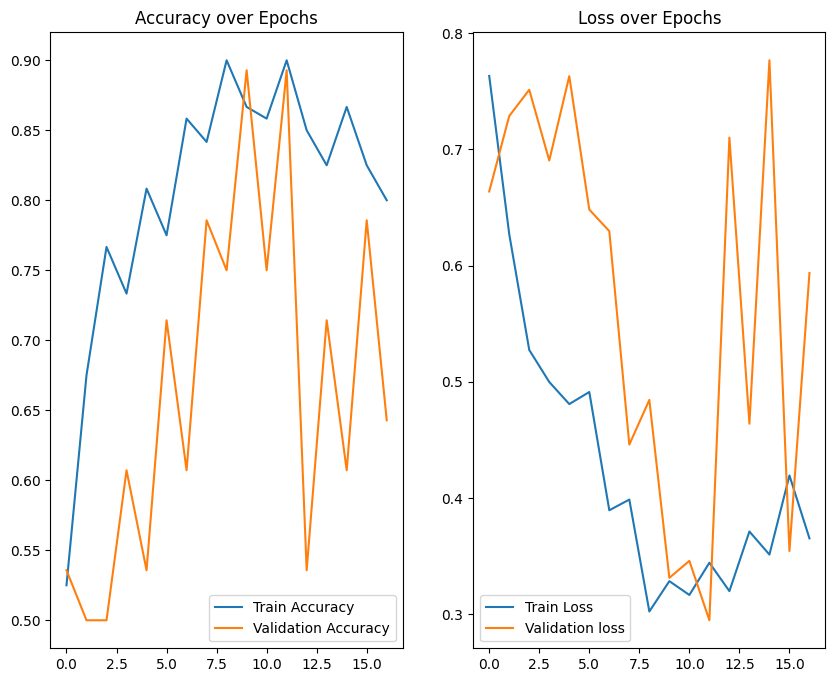

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')


plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.legend()
plt.title('Loss over Epochs')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: NORMAL (Confidence: 0.7611)


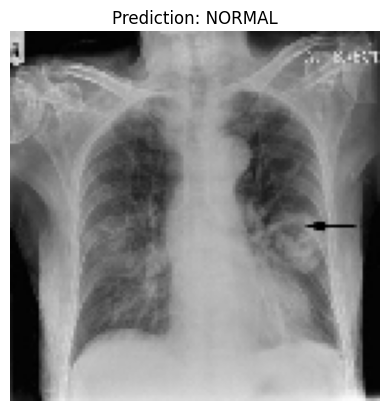

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as keras_image

# Load image and preprocess
img_path = '/content/img4.jpg'
img = keras_image.load_img(img_path, target_size=(128, 128))  # match model input
img_array = keras_image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Predict
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = np.max(predictions[0])

print(f"Prediction: {predicted_class} (Confidence: {confidence:.4f})")

# Show image
plt.imshow(img)
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels and predicted labels from the test generator
Y_true = test_generator.classes  # True labels (as integers)
Y_pred_probs = model.predict(test_generator)  # Predicted probabilities
Y_pred = np.argmax(Y_pred_probs, axis=1)  # Convert to class indices

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Print classification report
print("Classification Report:\n")
print(classification_report(Y_true, Y_pred, target_names=class_labels))

# Optional: confusion matrix
print("Confusion Matrix:\n")
print(confusion_matrix(Y_true, Y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 642ms/step
Classification Report:

              precision    recall  f1-score   support

      NORMAL       0.91      1.00      0.95        20
   PNEUMONIA       1.00      0.90      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40

Confusion Matrix:

[[20  0]
 [ 2 18]]


In [ ]:
# model.save('my_model.keras')